# ECE 2195 :  Exercise 2

## KNN Classifier

In this exercise, you will implement KNN for classification of the Iris dataset. 
You code should have comments for readability. You will also need to comment on your result where applicable. 

First, understand the dataset and its contents by finding the keys and reading the description of the dataset. 

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from collections import Counter

In [2]:
iris_dataset=load_iris() #creates an object that contains the iris dataset
print(iris_dataset.DESCR)

# print the keys as well
print(iris_dataset.keys())

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### A) To better understand the stucture of the dataset, answer the following
1. Find the type and shape of ‘data’ in the Iris_dataset
2. Print the first five rows of 'data' 
3. Print the feature_names
4. Print the target_names
5. print type and shape of 'target'
6. Print first 10 values of the target, then print the unique values using np.unique(iris_dataset['target'])

In [3]:
print(f'Data type: {iris_dataset.data.dtype}. Data shape: {iris_dataset.data.shape}')
print(f'First five rows of data: \n{iris_dataset.data[:5]}')
print(f'Feature names: {iris_dataset.feature_names}.')
print(f'Target names: {iris_dataset.target_names}.')
print(f'Target type: {iris_dataset.target.dtype}. Target shape: {iris_dataset.target.shape}.')
print(f'First ten rows of target: {iris_dataset.target[:10]}.')
print(f'Unique values: {np.unique(iris_dataset.target)}.')

Data type: float64. Data shape: (150, 4)
First five rows of data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'].
Target names: ['setosa' 'versicolor' 'virginica'].
Target type: int32. Target shape: (150,).
First ten rows of target: [0 0 0 0 0 0 0 0 0 0].
Unique values: [0 1 2].


### B) Implement KNN classifier
Use the train-test split to generate train and test data
(from sklearn.model_selection import train_test_split). In this part we will use just few test samples to validate your KNN implementation. 
Without using the KNeighborsClassifier built-in function, implement a KNN_classifier function that takes as an input (1) the training set, (2) one test sample, (3) the value of K. The function should return the label of the test sample and the counts (i.e. votes) corresponding to that label. Complete the program to test the function using the first two test samples.
Make your code generic for any K, then use K=3 for validating your function. Comment on your result. Were your predictions correct?


In [4]:
def KNN_classifier(X_train, Y_train, X0_test, k):
    # find the Euclidean distance from the test point to each training point
    distances = []
    for i in range(0, len(X_train)):
        distances.append(np.linalg.norm(X0_test - X_train[i]))
    
    max_val = max(distances)  
    min_indices = []
    
    # find the k smallest distances in the array
    for i in range(0, k):
        min_index = distances.index(min(distances))
        min_indices.append(min_index)
        distances[min_index] = max_val
        
    votes = []
    
    # see which class the nearest neighbors belong to
    for i in range(0, k):
        votes.append(Y_train[min_indices[i]])
    
    # count the occurrence of each class
    occurrence_count = Counter(votes)
    label = occurrence_count.most_common(1)[0][0]
        
    return label, votes

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=100)

# inspect the data visually
# iris_dataFrame = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# sm = pd.plotting.scatter_matrix(iris_dataFrame, c=Y_train, figsize=(15, 15))

k = 3
correct = 0
incorrect = 0

for i in range(0, len(X_test)):   
    label, votes = KNN_classifier(X_train, Y_train, X_test[i], k)
    print(f'The predicted label is {label}. The vote spread is {votes}. The correct label is {Y_test[i]}.')

    if label == Y_test[i]:
        correct += 1
    else:
        incorrect += 1
        
accuracy = correct / (correct + incorrect)
print(f'\nCorrect = {correct}. Incorrect = {incorrect}. Overall accuracy is: {100 * accuracy} %.')    

The predicted label is 2. The vote spread is [2, 2, 2]. The correct label is 2.
The predicted label is 0. The vote spread is [0, 0, 0]. The correct label is 0.
The predicted label is 2. The vote spread is [2, 2, 2]. The correct label is 2.
The predicted label is 0. The vote spread is [0, 0, 0]. The correct label is 0.
The predicted label is 2. The vote spread is [2, 2, 1]. The correct label is 2.
The predicted label is 2. The vote spread is [2, 2, 2]. The correct label is 2.
The predicted label is 0. The vote spread is [0, 0, 0]. The correct label is 0.
The predicted label is 0. The vote spread is [0, 0, 0]. The correct label is 0.
The predicted label is 2. The vote spread is [2, 2, 2]. The correct label is 2.
The predicted label is 0. The vote spread is [0, 0, 0]. The correct label is 0.
The predicted label is 0. The vote spread is [0, 0, 0]. The correct label is 0.
The predicted label is 2. The vote spread is [2, 2, 2]. The correct label is 2.
The predicted label is 0. The vote sprea

#### (AP): The predictions of the KNN algorithm look to be correct for the most part. For `k = 3`, the algorithm has an accuracy of 97.37%.

Note: I did compare my algorithm to the built-in functions that I used in Part C (still only using the first two features as in Part C) and ended up with some quirky behavior. For some values of k, my algorithm had a difference of 1-2 correct labels, but for other values of k the accuracy was identical between my algorithm and the scikit-learn function. I think this is just due to some small difference in figuring out which neighbors are the nearest ones between the two algorithms.

### C) In all questions that follow, feel free to use your implemented function from previous part or the built-in scikit-learn functions. 
Classify the Iris species with KNN approach using the first two feature only, and check the accuracy as K changes. Let K takes the values [1, 5, 10, 15]. No need to scale features.
In the code, use random_state=100 in train_test_split

Plot the accuracy versus K and comment on your result

K = 1.
Overall accuracy for k = 1 is: 73.68421052631578 %.

K = 5.
Overall accuracy for k = 5 is: 84.21052631578947 %.

K = 10.
Overall accuracy for k = 10 is: 84.21052631578947 %.

K = 15.
Overall accuracy for k = 15 is: 76.31578947368422 %.



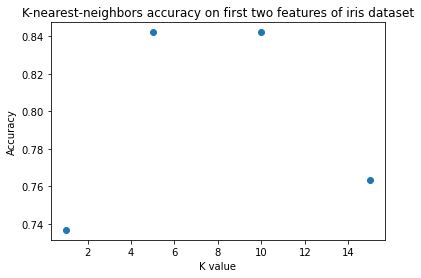

In [34]:
k_values =  [1, 5, 10, 15]
accuracies = []

X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=100)

# use only the first two features of X_train and X_test
X_train = np.array([x[0:2] for x in X_train])
X_test  = np.array([x[0:2] for x in X_test ])

for k in k_values:
    print(f'K = {k}.')
    
    # run the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    Y_predict = knn.predict(X_test)
    
    accuracy = knn.score(X_test, Y_test)
    print(f'Overall accuracy for k = {k} is: {100 * accuracy} %.\n')
    accuracies.append(accuracy)
    
plt.scatter(k_values, accuracies)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K-nearest-neighbors accuracy on first two features of iris dataset')
plt.show()

#### (AP): K = 5 and K = 10 seem to be in the optimal region between overfitting and underfitting for this problem. K = 1 is too low to capture the variability in the data and K = 15 is overfitting.

### D) Use the Iris example, and find the accuracy of the KNN approach with K=5 when different number of features is used without scaling. 

Here we just take features by the order they appear in the dataset. No feature selection. 

Print then plot the accuracy verus the number of feature (i.e. when using one, two, three, and the four features)



Overall accuracy for k = 5 with 1 feature(s) is: 78.94736842105263 %.

Overall accuracy for k = 5 with 2 feature(s) is: 84.21052631578947 %.

Overall accuracy for k = 5 with 3 feature(s) is: 92.10526315789474 %.

Overall accuracy for k = 5 with 4 feature(s) is: 97.36842105263158 %.



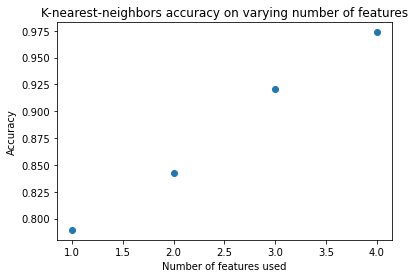

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=100)
k = 5
features = []
accuracies = []

for i in range(1, len(X_train[0]) + 1):
    features.append(i)
    
    # clip X_train and X_test to the first i features
    X_train_clipped = np.array([x[0:i] for x in X_train])
    X_test_clipped = np.array([x[0:i] for x in X_test])
    
    # run the KNN classifier as before
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_clipped, Y_train)
    
    Y_predict = knn.predict(X_test_clipped)

    accuracy = knn.score(X_test_clipped, Y_test)
    print(f'Overall accuracy for k = {k} with {i} feature(s) is: {100 * accuracy} %.\n')
    accuracies.append(accuracy)

plt.scatter(features, accuracies)
plt.xlabel('Number of features used')
plt.ylabel('Accuracy')
plt.title('K-nearest-neighbors accuracy on varying number of features')
plt.show()

### E) Repeat D when feature scaling with MinMaxScaler is used. 
### Comment on your results.

Overall accuracy for k = 5 with 1 feature(s) is: 78.94736842105263 %.

Overall accuracy for k = 5 with 2 feature(s) is: 86.8421052631579 %.

Overall accuracy for k = 5 with 3 feature(s) is: 92.10526315789474 %.

Overall accuracy for k = 5 with 4 feature(s) is: 97.36842105263158 %.



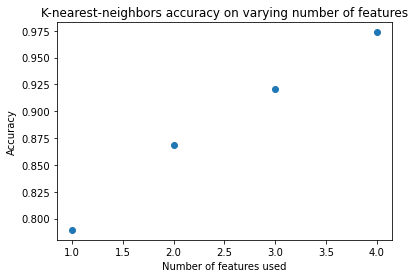

In [33]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

features = []
accuracies = []

for i in range(1, len(X_train_transformed[0]) + 1):
    features.append(i)
    
    X_train_clipped = np.array([x[0:i] for x in X_train_transformed])
    X_test_clipped = np.array([x[0:i] for x in X_test_transformed])
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_clipped, Y_train)
    
    Y_predict = knn.predict(X_test_clipped)

    accuracy = knn.score(X_test_clipped, Y_test)
    print(f'Overall accuracy for k = {k} with {i} feature(s) is: {100 * accuracy} %.\n')
    accuracies.append(accuracy)

plt.scatter(features, accuracies)
plt.xlabel('Number of features used')
plt.ylabel('Accuracy')
plt.title('K-nearest-neighbors accuracy on varying number of features')
plt.show()

#### (AP): The scaling seems to not have much of an effect on the accuracy in this case. The only difference is with 2 features, where there is a 2 percentage point increase in accuracy (which should just be equivalent to one more correctly labeled test sample).